In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest

In [2]:
filepath=r"C:\Users\milam\OneDrive - ALS Bobi\Desktop\diamonds-dataset\diamonds.csv"

data=pd.read_csv(filepath, header=0)
data.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
label_encoders = {}
for col in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [4]:
column_names = data.columns
X = data.drop('price', axis=1).values.astype(float)
y = data["price"].values.astype(float)
N = X.shape[0]
number_of_features = X.shape[1]
feature_names = column_names[1:]

print(X.shape)
print(y.shape)
print("Карактеристики:", feature_names)
print("Број на карактеристики:", X.shape[1])
print("Број на излезни класи: ", len(np.unique(y)))
print("Број на инстанци:", X.shape[0])

(53940, 10)
(53940,)
Карактеристики: Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
Број на карактеристики: 10
Број на излезни класи:  11602
Број на инстанци: 53940


In [5]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  int32  
 3   color       53940 non-null  int32  
 4   clarity     53940 non-null  int32  
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int32(3), int64(2)
memory usage: 3.9 MB


In [7]:
data.drop("Unnamed: 0", axis=1, inplace=True)
X=data.drop("price", axis=1)

<Axes: >

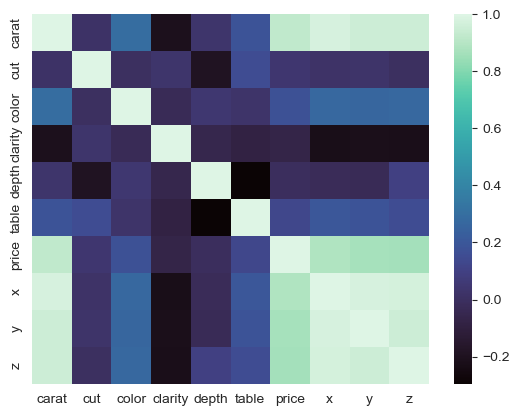

In [109]:
sns.heatmap(data.corr(), cmap='mako')

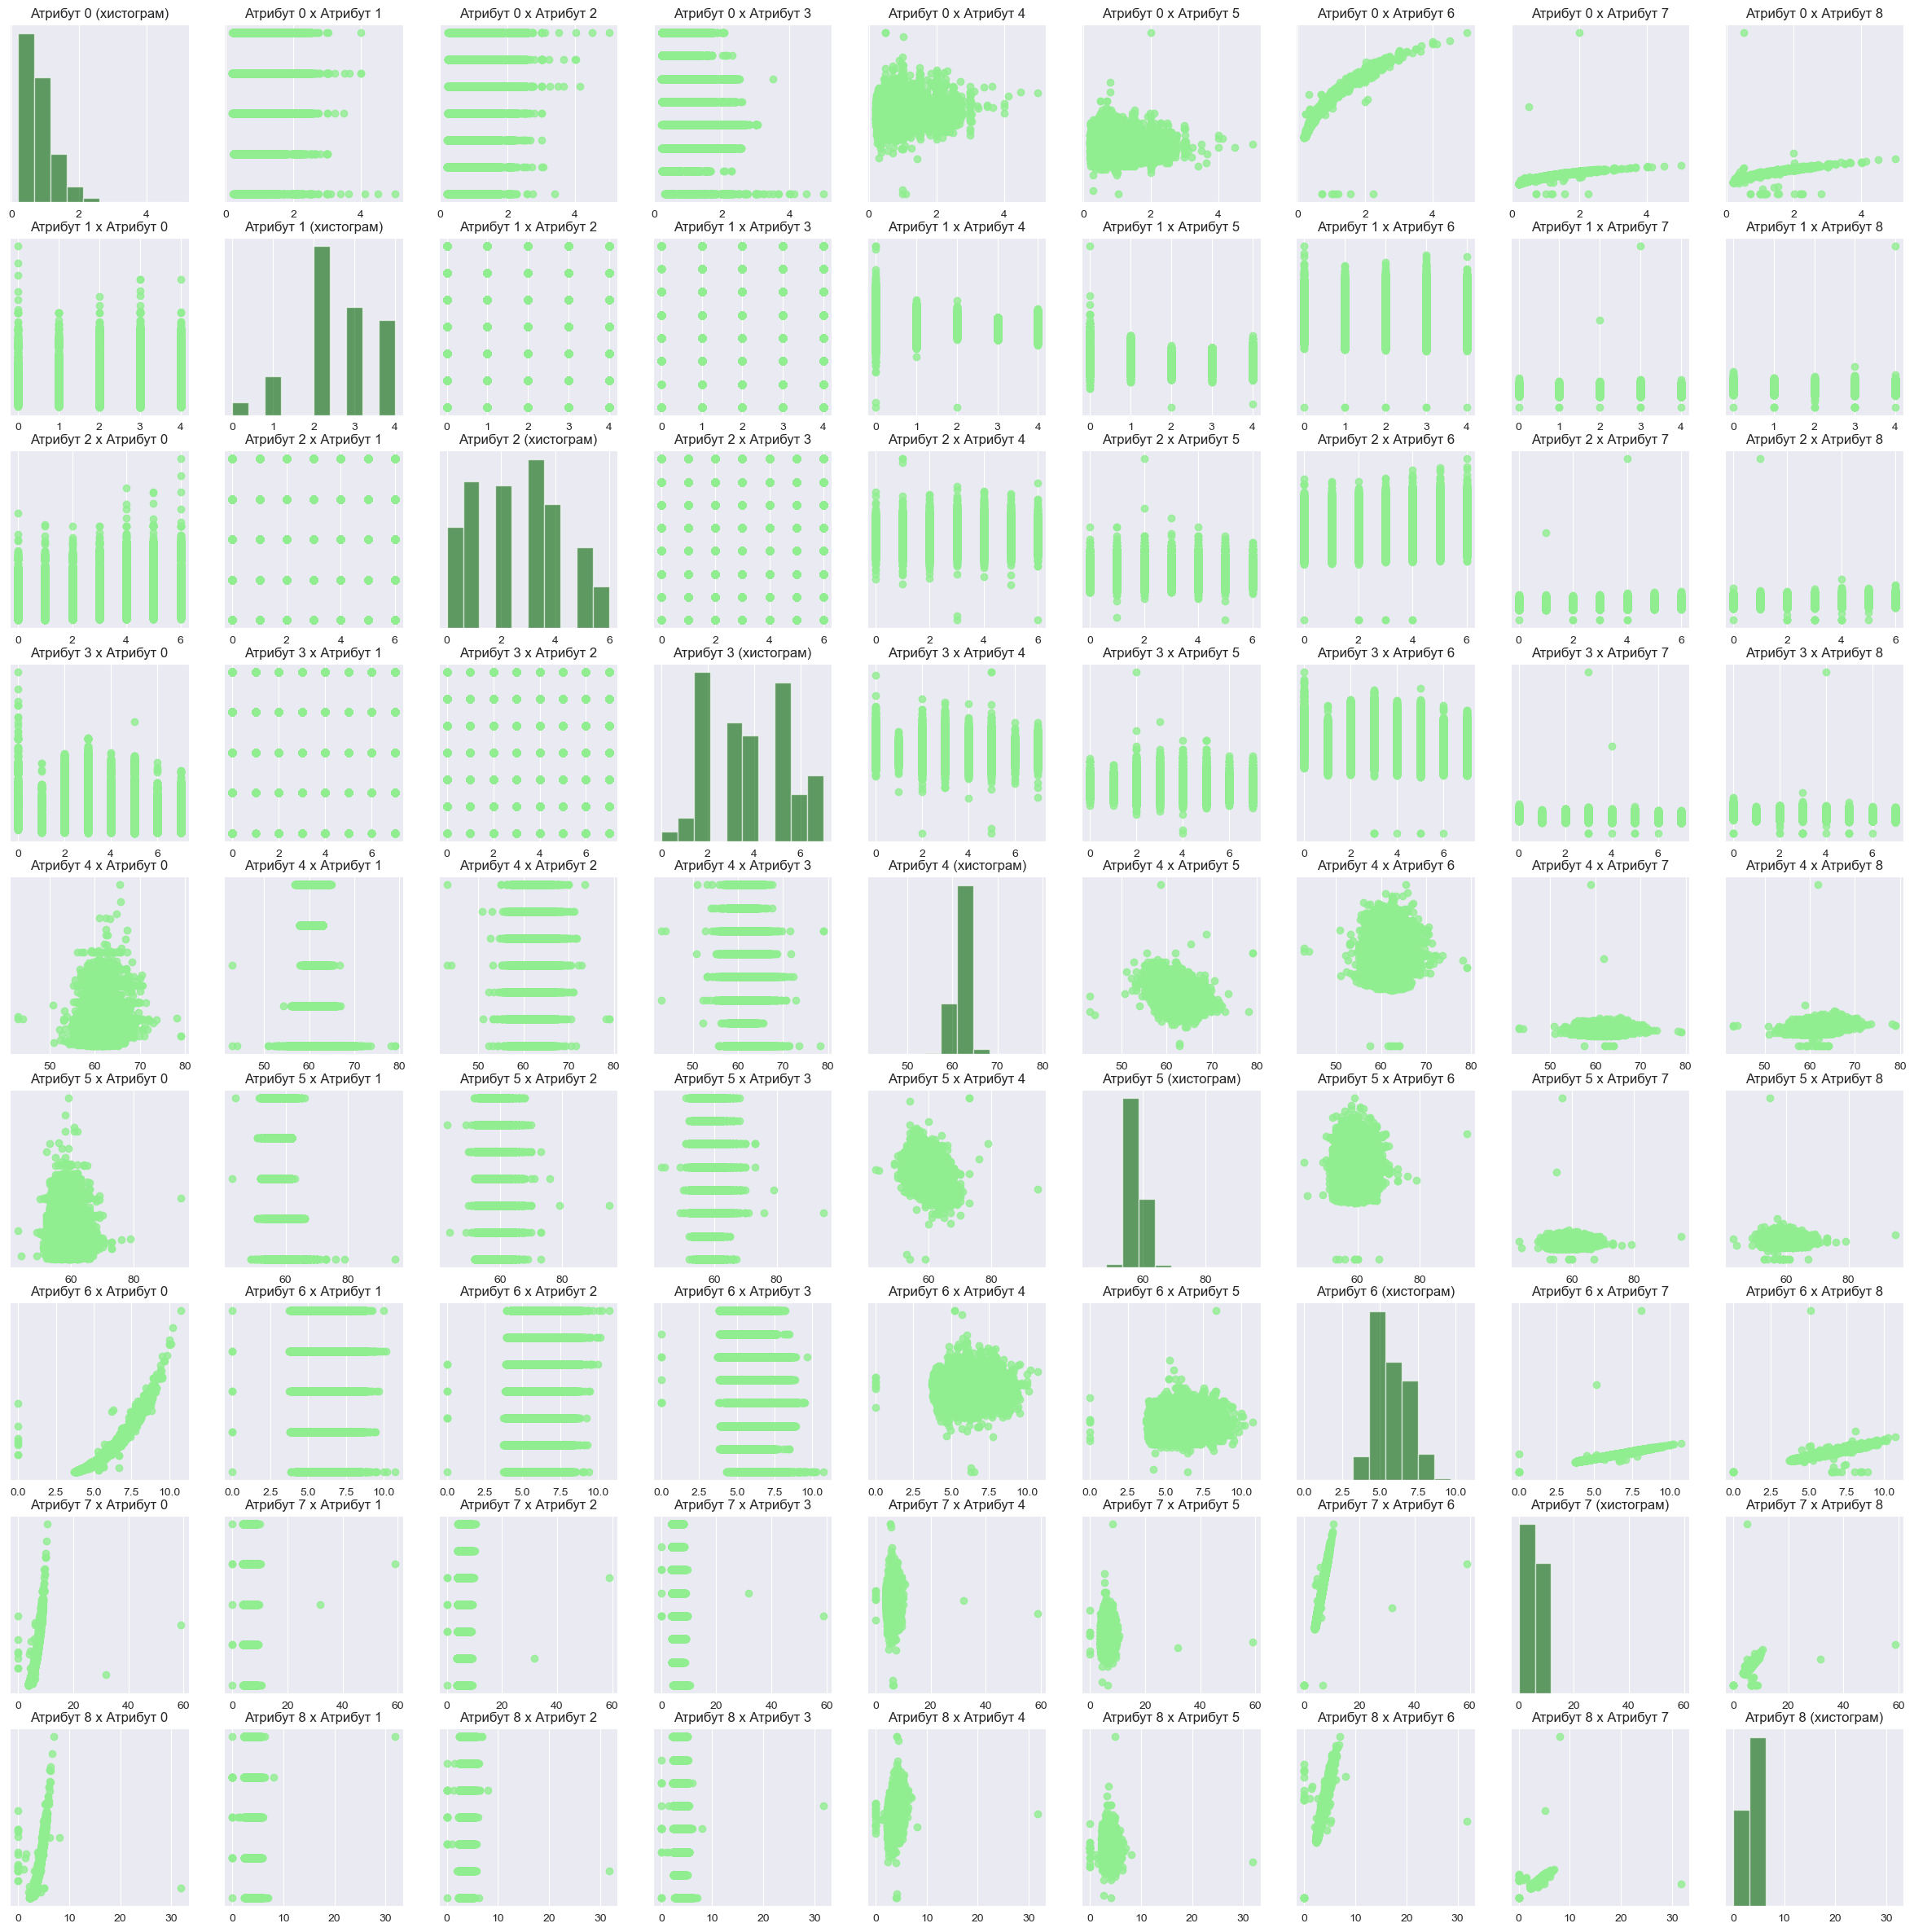

In [15]:
fig = plt.figure(figsize=(30, 30))
fig.subplots(nrows=number_of_features-1, ncols=number_of_features-1)
for feat_i in range(number_of_features-1):
    for feat_j in range(number_of_features-1):
        ax = plt.subplot(number_of_features-1,number_of_features-1,(number_of_features-1)*feat_i + feat_j+1)
        if feat_i==feat_j:
          plt.hist(X.iloc[:, feat_i], alpha=.6, color="darkgreen")
          plt.title("Атрибут "+str(feat_i)+" (хистограм)")
        else:
          plt.scatter(X.iloc[:,feat_i], X.iloc[:,feat_j],  alpha=.8, color="lightgreen")
          plt.title("Атрибут "+str(feat_i)+" x Атрибут "+str(feat_j))
        plt.yticks(())
plt.show()

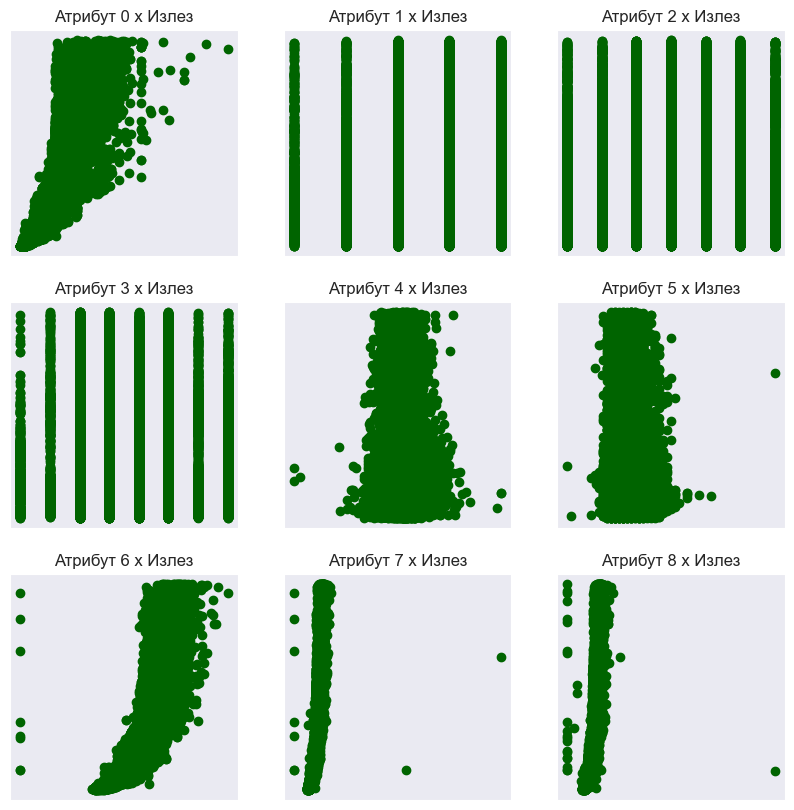

In [16]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=3,ncols=3)
for feat_i in range(number_of_features-1):
    ax = plt.subplot(3,3, feat_i+1)
    plt.scatter( X.iloc[:,feat_i], y, color="darkgreen")
    plt.xticks(())
    plt.yticks(())
    plt.title("Атрибут "+str(feat_i)+" x Излез")
plt.show()

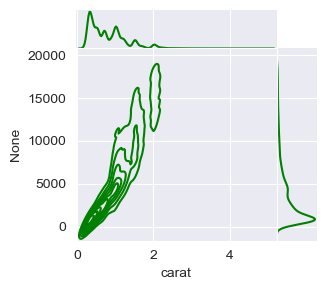

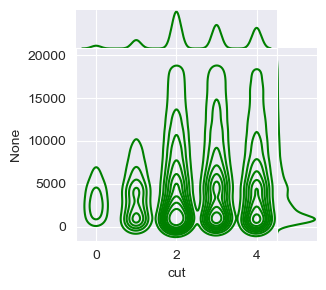

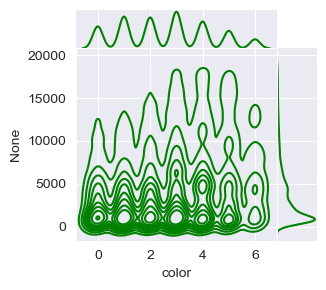

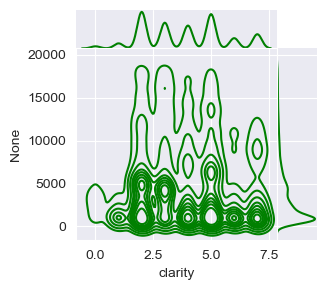

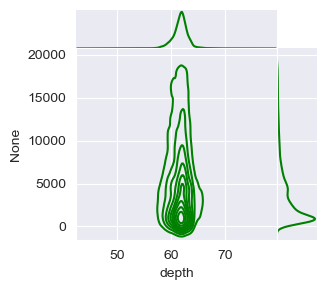

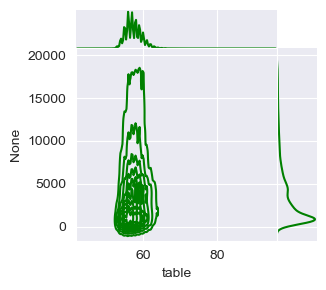

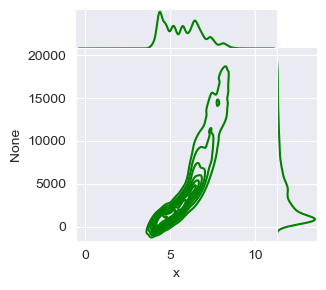

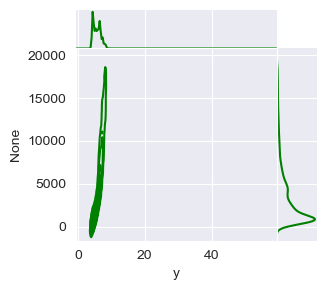

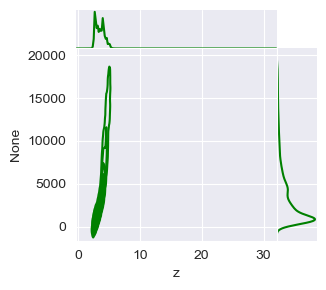

In [18]:
for feat_i in range(number_of_features-1):
    sns.jointplot(x=X.iloc[:,feat_i], y=y, kind="kde", space=0, color="g", height = 3)
plt.show()

In [19]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Coefficients W:  [ 5.24959577e+04  2.90119428e+02 -1.61028038e+03  2.00383773e+03
 -5.47259585e+03 -4.87071453e+03 -1.21484649e+04  1.16450642e+03
  3.65232807e+01]
Mean squred error: 1772260.3205072277


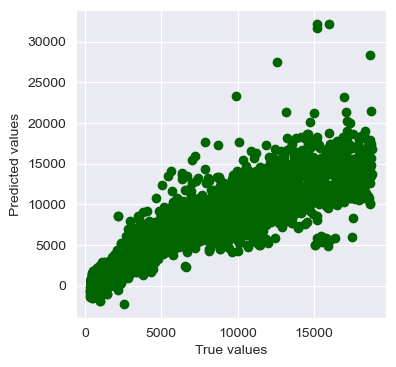

In [20]:
lr = LinearRegression().fit(X_train, y_train)
print("Coefficients W: ", lr.coef_)

y_pred = lr.predict(X_test)
print("Mean squred error:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred, color="darkgreen")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()


Coefficients W:  [ 4.90912233e+04  2.97532255e+02 -1.58054388e+03  2.01798324e+03
 -4.82983043e+03 -4.73367996e+03 -8.61257361e+03 -1.69688726e+01
 -8.39747492e+02]
Mean squred error: 1780894.2880237827


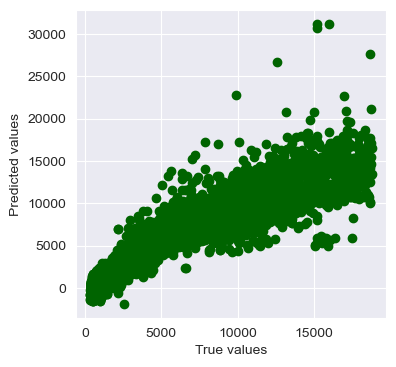

In [21]:
ridge = RidgeCV().fit(X_train, y_train)
print("Coefficients W: ", ridge.coef_)

y_pred = ridge.predict(X_test)
print("Mean squred error:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred,color = "darkgreen")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

Coefficients W:  [ 50757.40559188    290.18738155  -1594.4020457    2012.09390108
  -4907.00905394  -4561.34972759 -10319.55731044     -0.
     -0.        ]
Mean squred error: 1775843.443147212


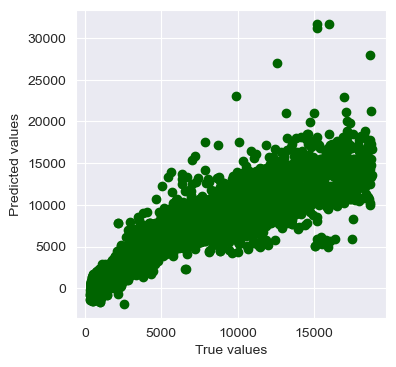

In [22]:
lasso = LassoCV().fit(X_train, y_train)
print("Coefficients W: ", lasso.coef_)

y_pred = lasso.predict(X_test)

print("Mean squred error:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred,color = "darkgreen")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

Coefficients W:  [5060.18509046  286.24386825  851.63285619 -127.39301801  -15.07222699
  223.79452073 5044.9642844   916.9286596  1043.28585337]
Mean squared error:  9008655.508737382


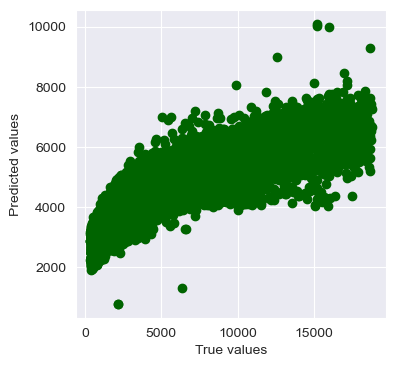

In [23]:
elastic = ElasticNet(alpha=0.1).fit(X_train, y_train)
print("Coefficients W: ", elastic.coef_)

y_pred = elastic.predict(X_test)
print("Mean squared error: ", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred,color = "darkgreen")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

Coefficients W:  [ 5.24746934e+04  2.90174259e+02 -1.61009922e+03  2.00393212e+03
 -5.46817622e+03 -4.86997155e+03 -1.21230283e+04  1.14645382e+03
  2.44213602e+01]
Mean squred error: 1772285.1240971147


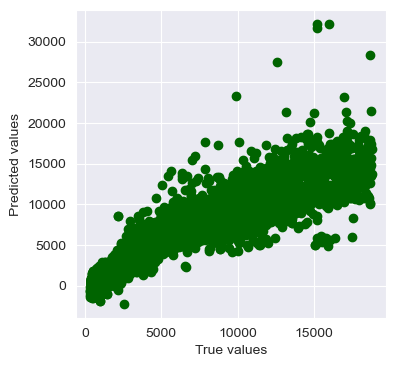

In [24]:
bayes = BayesianRidge().fit(X_train, y_train)
print("Coefficients W: ", bayes.coef_)

y_pred, y_std = bayes.predict(X_test, return_std = True)

print("Mean squred error:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(4, 4))
plt.scatter(y_test,y_pred,color = "darkgreen")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

In [36]:
Xi=X[:,0].reshape(-1,1)
y=np.log(y)
lr = LinearRegression()
lr.fit(Xi, y)
lrsigma = np.sum((y - lr.predict(Xi))**2) /(N-2)

ridge = RidgeCV()
ridge.fit(Xi, y)
ridgesigma = np.sum((y - ridge.predict(Xi))**2) /(N-2)

lasso = LassoCV()
lasso.fit(Xi, y)
lassosigma = np.sum((y - lasso.predict(Xi))**2) /(N-2)

elastic = ElasticNet(alpha=0.1)
elastic.fit(Xi, y)
elasticsigma = np.sum((y - elastic.predict(Xi))**2) /(N-2)

bayes = BayesianRidge()
bayes.fit(Xi, y)

BayesianRidge()

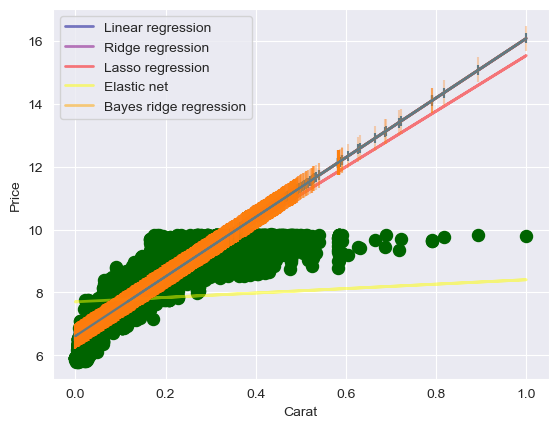

In [37]:
line_X = X[:,0].reshape(-1,1)
line_y = lr.predict(line_X)
line_y_ridge = ridge.predict(line_X)
line_y_lasso = lasso.predict(line_X)
line_y_elastic = elastic.predict(line_X)
line_y_bayes, Bayessigma = bayes.predict(line_X, return_std = True)

lw = 2
plt.figure()
plt.scatter(Xi, y, color='darkgreen', marker='.', s = 300)
plt.plot(line_X, line_y, color='darkblue', linewidth=lw, label='Linear regression', alpha=0.5)
plt.errorbar(line_X, line_y,yerr=lrsigma)
plt.plot(line_X, line_y_ridge, color='purple', linewidth=lw, label='Ridge regression', alpha=0.5)
plt.plot(line_X, line_y_lasso, color='red', linewidth=lw, label='Lasso regression', alpha=0.5)
plt.plot(line_X, line_y_elastic, color="yellow", linewidth=lw, label='Elastic net', alpha=0.5)
plt.plot(line_X, line_y_bayes, color="orange", linewidth=lw, label='Bayes ridge regression', alpha=0.5)
plt.errorbar(line_X, line_y_bayes, yerr=Bayessigma, alpha = 0.3)

plt.legend(loc='best')
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()